# Florence-2: Open Source Vision Foundation Model
Florence-2 is a lightweight vision-language foundation model developed by Microsoft Azure AI and open-sourced under the MIT license. It aims to achieve a unified, prompt-based representation for diverse vision and vision-language tasks, including captioning, object detection, grounding, and segmentation. Despite its compact size, Florence-2 rivals much larger models like Kosmos-2 in performance. Florence-2 represents a significant advancement in vision-language models by combining lightweight architecture with robust capabilities, making it highly accessible and versatile. Its unified representation approach, supported by the extensive FLD-5B dataset, enables it to excel in multiple vision tasks without the need for separate models. This efficiency makes Florence-2 a strong contender for real-world applications, particularly on devices with limited resources.
# Paper 
https://arxiv.org/pdf/2311.06242
# Models
https://huggingface.co/microsoft/Florence-2-large
# Dataset
Training set (FLD-5B) of 126M images, more than 500M text annotations, 1.3B region-text annotations, and 3.6B textphrase-region annotations. Each image is annotated with text, region-text pairs, and text-phrase-region triplets and each annotation type has multiple instances varying in diverse granularity


In [8]:
import platform

%pip install -q "openvino>=2024.3.0" "einops" "torch>2.1" "torchvision" "timm>=0.9.8" "transformers>=4.41" "pillow" "gradio>=4.19" --extra-index-url https://download.pytorch.org/whl/cpu

if platform.system() != "Windows":
    %pip install -q "matplotlib>=3.4"
else:
    %pip install -q "matplotlib>=3.4,<3.7"

Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
weasel 0.4.1 requires smart-open<8.0.0,>=5.2.1, which is not installed.
langchain-cli 0.0.21 requires tomlkit<0.13.0,>=0.12.2, but you have tomlkit 0.12.0 which is incompatible.
langchain-cli 0.0.21 requires typer[all]<0.10.0,>=0.9.0, but you have typer 0.12.5 which is incompatible.
langchain-cli 0.0.21 requires uvicorn<0.24.0,>=0.23.2, but you have uvicorn 0.24.0 which is incompatible.
openvino-tokenizers 2024.2.0.0 requires openvino~=2024.2.0.0.dev, but you have openvino 2024.3.0 which is incompatible.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests
from pathlib import Path

In [15]:


if not Path("ov_florence2_helper.py").exists():
    r = requests.get(url="https://raw.githubusercontent.com/openvinotoolkit/openvino_notebooks/latest/notebooks/florence2/ov_florence2_helper.py")
    open("ov_florence2_helper.py", "w", encoding="utf-8").write(r.text)


if not Path("gradio_helper.py").exists():
    r = requests.get(url="https://raw.githubusercontent.com/openvinotoolkit/openvino_notebooks/latest/notebooks/florence2/gradio_helper.py")
    open("gradio_helper.py", "w", encoding="utf-8").write(r.text)

if not Path("notebook_utils.py").exists():
    r = requests.get(url="https://raw.githubusercontent.com/openvinotoolkit/openvino_notebooks/latest/utils/notebook_utils.py")
    open("notebook_utils.py", "w" ,ncoding="utf-8").write(r.text)

In [1]:
from ov_florence2_helper import convert_florence2, get_model_selector

model_selector = get_model_selector()

model_selector

Dropdown(description='Model:', options=('microsoft/Florence-2-base-ft', 'microsoft/Florence-2-base', 'microsof…

In [4]:
model_id = model_selector.value
model_path = Path(model_id.split("/")[-1])

# Uncomment the line to see conversion code
#??convert_florence2

In [42]:
convert_florence2(model_id, model_path)

✅ microsoft/Florence-2-base-ft already converted and can be found in Florence-2-base-ft


In [5]:
from notebook_utils import device_widget

device = device_widget()

device

Dropdown(description='Device:', index=1, options=('CPU', 'AUTO'), value='AUTO')

In [6]:
from ov_florence2_helper import OVFlorence2Model

In [7]:
model = OVFlorence2Model(model_path, device.value)

In [41]:
import requests
from PIL import Image

from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained(model_path, trust_remote_code=True)

prompt = "<OD>"

# url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
# image = Image.open(requests.get(url, stream=True).raw)
path = "images/buildings.jpg"
image = Image.open(path)
#image

In [34]:
image.width

6720

In [35]:
inputs = processor(text=prompt, images=image, return_tensors="pt")



In [36]:
inputs.keys()

dict_keys(['input_ids', 'attention_mask', 'pixel_values'])

In [17]:
inputs["pixel_values"].shape

torch.Size([1, 3, 768, 768])

In [27]:
inputs["input_ids"]

tensor([[    0, 47066, 21700,    19,    10, 17818,    99,    16,  2343,    11,
             5,  2274,     4,     2]])

In [18]:
generated_ids = model.generate(input_ids=inputs["input_ids"], pixel_values=inputs["pixel_values"], max_new_tokens=1024, do_sample=False, num_beams=3)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

parsed_answer = processor.post_process_generation(generated_text, task="<OD>", image_size=(image.width, image.height))

In [19]:
parsed_answer

{'<OD>': {'bboxes': [[3.359999895095825,
    2331.840087890625,
    6709.919921875,
    4473.27978515625],
   [3.359999895095825, 2842.56005859375, 6709.919921875, 4473.27978515625],
   [2772.0, 2318.39990234375, 4277.27978515625, 3666.880126953125],
   [4196.6396484375, 2703.679931640625, 4935.83984375, 3689.280029296875],
   [3.359999895095825, 2842.56005859375, 305.7599792480469, 3859.52001953125],
   [4888.7998046875, 3295.0400390625, 5439.83984375, 4473.27978515625],
   [3.359999895095825, 3321.919921875, 251.99998474121094, 4473.27978515625],
   [789.5999755859375, 4146.240234375, 944.1599731445312, 4473.27978515625],
   [2543.52001953125, 4052.159912109375, 2644.31982421875, 4312.0]],
  'labels': ['skyscraper',
   'skyscraper',
   'skyscraper',
   'skyscraper',
   'skyscraper',
   'street light',
   'street light',
   'street light',
   'street light']}}

In [20]:
import io
import copy
import random
import requests
from pathlib import Path

import gradio as gr
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

from PIL import Image, ImageDraw

In [21]:
def plot_bbox(image, data):
    fig, ax = plt.subplots()
    ax.imshow(image)
    for bbox, label in zip(data["bboxes"], data["labels"]):
        x1, y1, x2, y2 = bbox
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor="r", facecolor="none")
        ax.add_patch(rect)
        plt.text(x1, y1, label, color="white", fontsize=8, bbox=dict(facecolor="red", alpha=0.5))
    ax.axis("off")
    return fig

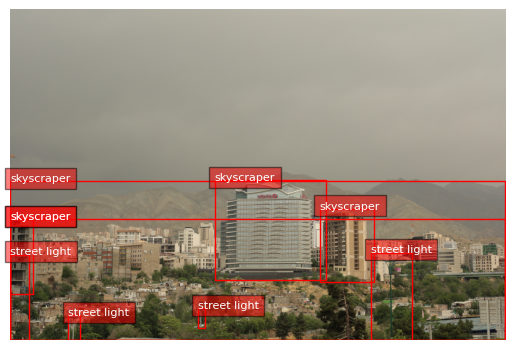

In [22]:
#from gradio_helper import plot_bbox

fig = plot_bbox(image, parsed_answer["<OD>"])

In [37]:
prompt = "<MORE_DETAILED_CAPTION>"
inputs = processor(text=prompt, images=image, return_tensors="pt")

In [38]:
generated_ids = model.generate(input_ids=inputs["input_ids"], pixel_values=inputs["pixel_values"], max_new_tokens=1024, do_sample=False, num_beams=3)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

parsed_answer = processor.post_process_generation(generated_text, task="<MORE_DETAILED_CAPTION>", image_size=(image.width, image.height))

In [39]:
parsed_answer

{'<MORE_DETAILED_CAPTION>': 'This is an image of a city. The city is filled with buildings. The buildings are very tall. The building in the middle is made of glass and metal. The sky is gray and cloudy. There are mountains in the background. The mountains are brown and gray. The trees in the foreground are green and healthy. There is a street light by the buildings.'}

In [40]:
from gradio_helper import make_demo

demo = make_demo(model, processor)

try:
    demo.launch(debug=True, height=600)
except Exception:
    demo.launch(debug=True, share=True, height=600)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.
